# <span style="color:blue"> Red Neuronal con Keras e Iris dataset 

In [1]:
import os
import numpy
import pandas
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.utils import np_utils
from keras.models import Sequential

from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score

from sklearn.model_selection import train_test_split

weights_name = "weights.hdf5"
numpy.random.seed(0)

Using TensorFlow backend.
/home/aolmo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### <span style="color:blue"> 1. Cargar el dataset </span>

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values

X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

Con <b>train_test_split</b> podemos dividir todo el dataset en **training** y **test** sets:

In [3]:
X_train, X_test, y_train, y_test = \
          train_test_split(X, Y, test_size=0.2, random_state=42)

### <span style="color:blue">2.  Preprocesar las labels

In [4]:
# Con LabelEncoder encontramos cuantos valores diferentes hay en Y
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)

In [5]:
encoded_y_train[:10]

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0])

In [6]:
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)

# to_categorical convierte las labels en un one-hot vector
y_train = np_utils.to_categorical(encoded_y_train)
y_test = np_utils.to_categorical(encoded_y_test)

y_train[:3]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

### <span style="color:blue"> 3. Crear el modelo

La siguiente red neuronal tendrá la forma **4-10-10-3**

In [7]:
# Elegimos el tipo de modelo
model = Sequential()

# Añadimos las layers
model.add(Dense(4, input_dim=4, init='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printa el resumen del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


/home/aolmo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, input_dim=4, activation="relu", kernel_initializer="normal")`
  """


### <span style="color:blue"> 4. Entrenar el modelo con el training set

In [8]:
history = model.fit(X_train, y_train, epochs=200, batch_size=5)
# model.save_weights(weights_name)

Epoch 1/200
120/120 [==============================] - 0s - loss: 1.0989 - acc: 0.6333         
Epoch 2/200
120/120 [==============================] - 0s - loss: 1.0961 - acc: 0.6750     
Epoch 3/200
120/120 [==============================] - 0s - loss: 1.0898 - acc: 0.6750     
Epoch 4/200
120/120 [==============================] - 0s - loss: 1.0738 - acc: 0.6750     
Epoch 5/200
120/120 [==============================] - 0s - loss: 1.0503 - acc: 0.6750     
Epoch 6/200
120/120 [==============================] - 0s - loss: 1.0109 - acc: 0.6750     
Epoch 7/200
120/120 [==============================] - 0s - loss: 0.9468 - acc: 0.6750     
Epoch 8/200
120/120 [==============================] - 0s - loss: 0.8549 - acc: 0.6750     
Epoch 9/200
120/120 [==============================] - 0s - loss: 0.7429 - acc: 0.6750     
Epoch 10/200
120/120 [==============================] - 0s - loss: 0.6333 - acc: 0.6750     
Epoch 11/200
120/120 [==============================] - 0s - loss: 0.5437 -

120/120 [==============================] - 0s - loss: 0.0667 - acc: 0.9667     
Epoch 90/200
120/120 [==============================] - 0s - loss: 0.0761 - acc: 0.9833     
Epoch 91/200
120/120 [==============================] - 0s - loss: 0.0676 - acc: 0.9750     
Epoch 92/200
120/120 [==============================] - 0s - loss: 0.0646 - acc: 0.9833     
Epoch 93/200
120/120 [==============================] - 0s - loss: 0.0630 - acc: 0.9833     
Epoch 94/200
120/120 [==============================] - 0s - loss: 0.0750 - acc: 0.9750     
Epoch 95/200
120/120 [==============================] - 0s - loss: 0.0739 - acc: 0.9667     
Epoch 96/200
120/120 [==============================] - 0s - loss: 0.0721 - acc: 0.9583     
Epoch 97/200
120/120 [==============================] - 0s - loss: 0.0772 - acc: 0.9750     
Epoch 98/200
120/120 [==============================] - 0s - loss: 0.0646 - acc: 0.9750     
Epoch 99/200
120/120 [==============================] - 0s - loss: 0.0676 - acc: 0.

120/120 [==============================] - 0s - loss: 0.0740 - acc: 0.9583     
Epoch 177/200
120/120 [==============================] - 0s - loss: 0.0634 - acc: 0.9750     
Epoch 178/200
120/120 [==============================] - 0s - loss: 0.0598 - acc: 0.9750     
Epoch 179/200
120/120 [==============================] - 0s - loss: 0.0617 - acc: 0.9750     
Epoch 180/200
120/120 [==============================] - 0s - loss: 0.0737 - acc: 0.9583     
Epoch 181/200
120/120 [==============================] - 0s - loss: 0.0627 - acc: 0.9750     
Epoch 182/200
120/120 [==============================] - 0s - loss: 0.0653 - acc: 0.9833     
Epoch 183/200
120/120 [==============================] - 0s - loss: 0.0649 - acc: 0.9833     
Epoch 184/200
120/120 [==============================] - 0s - loss: 0.0605 - acc: 0.9667     
Epoch 185/200
120/120 [==============================] - 0s - loss: 0.0835 - acc: 0.9667     
Epoch 186/200
120/120 [==============================] - 0s - loss: 0.0688

### <span style="color:blue">5. Evaluar el modelo con el test set y graficar

In [9]:
print(y_test.shape)
score = model.evaluate(X_test, y_test)
print("Loss:", score[0])
print("Accuracy: {}%".format(score[1] * 100))

(30, 3)
30/30 [==============================] - 0s
Loss: 0.0507191978395
Accuracy: 100.0%


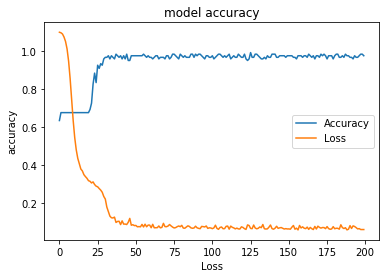

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Loss')
plt.legend(['Accuracy', 'Loss'], loc='center right')
plt.show()